In [1]:
! pip install tensorflow
! pip install keras

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras


In [46]:
BATCH_SIZE = 32
HEIGHT = 24
WIDTH = 24

In [47]:
training = tf.keras.utils.image_dataset_from_directory(
  "./images/train",
  seed=123,
  image_size=(HEIGHT, WIDTH),
  batch_size=BATCH_SIZE,
  color_mode="grayscale",
)

Found 76109 files belonging to 94 classes.


In [48]:
validation = tf.keras.utils.image_dataset_from_directory(
  "./images/validation",
  seed=123,
  image_size=(HEIGHT, WIDTH),
  batch_size=BATCH_SIZE,
  color_mode="grayscale",
)

Found 10963 files belonging to 94 classes.


In [62]:
classes = dict()

for className in training.class_names:
    classes[chr(int(className))] = className

In [76]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
  layers.Rescaling(1.0 / 255, input_shape=(HEIGHT, WIDTH, 1)),
  layers.Conv2D(16, 3, activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(classes))
])

ValueError: Computed output size would be negative. Received `inputs shape=(None, 1, 1, 64)`, `kernel shape=(3, 3, 64, 128)`, `dilation_rate=[1 1]`.

In [75]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_9 (Rescaling)         │ (None, 24, 24, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 22, 22, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 11, 11, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 9, 9, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 2, 2, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 94)             │        12,126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,742 (170.87 KB)

 Trainable params: 43,742 (170.87 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
EPOCHS = 10

history = model.fit(
  training,
  validation_data=validation,
  epochs=EPOCHS
)

Epoch 1/10
2379/2379 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3368 - loss: 2.6841 - val_accuracy: 0.6977 - val_loss: 1.0226
Epoch 2/10
2379/2379 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7177 - loss: 0.9239 - val_accuracy: 0.7581 - val_loss: 0.7814
Epoch 3/10
2379/2379 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7684 - loss: 0.7246 - val_accuracy: 0.7729 - val_loss: 0.7123
Epoch 4/10
2379/2379 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7930 - loss: 0.6397 - val_accuracy: 0.7835 - val_loss: 0.6698
Epoch 5/10
2379/2379 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8092 - loss: 0.5841 - val_accuracy: 0.7910 - val_loss: 0.6364
Epoch 6/10
2379/2379 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8204 - loss: 0.5421 - val_accuracy: 0.8072 - val_loss: 0.5880
Epoch 7/10
2379/2379 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8272 - loss: 0.5111 - val_accuracy: 0.8065 - val_loss: 0.5874
Epoch 8/10
2379/2379 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8345 - loss: 0

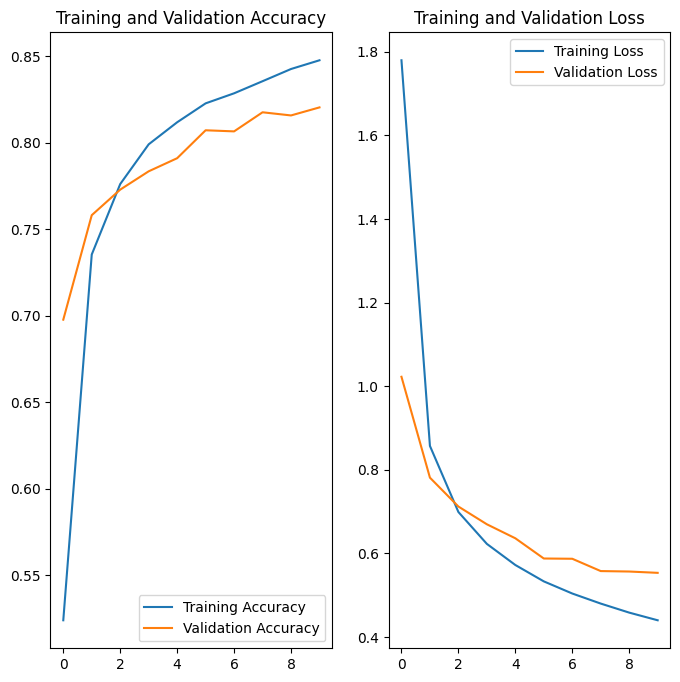

In [73]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()